In [1]:
import pandas as pd
import numpy as np

import sys
from pathlib import Path
# Add the parent directory to the sys.path (without this we cannot import constants or scripts)
sys.path.insert(0, str(Path.cwd().parent))
from src.plotting import plot_comparison_GER_HIC_GLO

%load_ext autoreload

In [5]:
DATA_PATH = '../data/final'
OUTPUT_PATH = 'output'
cvd_data_path = f'{DATA_PATH}/gbd_cardiovascularglobal.csv'
YEAR_COLUMN_NAME = 'year'
VALUE_COLUMN_NAME = 'val'

## Load Data

In [3]:
df = pd.read_csv(cvd_data_path)
df = df[df['age_name'] == 'All ages']
df.drop(columns=['measure_id', 'location_id', 'sex_id', 'sex_name', 'metric_id', 'upper', 'lower', 'age_name', 'age_id'], inplace=True)
df

,measure_name,location_name,cause_id,cause_name,metric_name,year,val
16,Deaths,Djibouti,491,Cardiovascular diseases,Rate,1990,69.240798
37,Deaths,Greece,491,Cardiovascular diseases,Rate,1990,439.652854
58,Deaths,Global,491,Cardiovascular diseases,Rate,1990,225.584376
79,Deaths,Liberia,491,Cardiovascular diseases,Rate,1990,152.243859
90,Deaths,Timor-Leste,491,Cardiovascular diseases,Rate,1990,79.809246
...,...,...,...,...,...,...,...
259360,Incidence,Saint Kitts and Nevis,491,Cardiovascular diseases,Rate,2015,696.196486
259361,Incidence,Saint Kitts and Nevis,491,Cardiovascular diseases,Rate,2016,715.347759
259362,Incidence,Saint Kitts and Nevis,491,Cardiovascular diseases,Rate,2017,735.571028
259363,Incidence,Saint Kitts and Nevis,491,Cardiovascular diseases,Rate,2018,756.091667


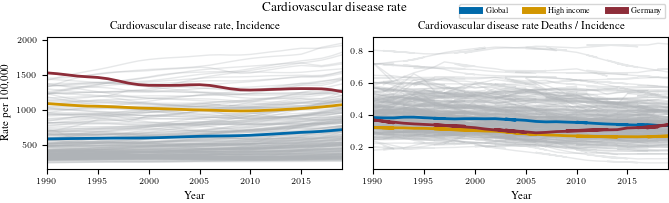

In [11]:
%autoreload 2

plot_comparison_GER_HIC_GLO(df=df, year_column=YEAR_COLUMN_NAME, value_column=VALUE_COLUMN_NAME, output_fig_path=f'{OUTPUT_PATH}/cardiovascular_disease_mortality_rate.pdf',
                            title='Cardiovascular disease rate', country_column='location_name', indicator1='Incidence', 
                            indicator2='Deaths', indicator_column='measure_name', xlabel='Year', ylabel='Rate per 100,000')